In [1]:
%matplotlib inline
import pyaf
import datetime

In [2]:

import pandas as pd
import numpy as np
import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds

#get_ipython().magic('matplotlib inline')

b1 = tsds.load_ozone()
df = b1.mPastData


df[b1.mTimeVar + '_Hourly'] = pd.date_range('2000-1-1', periods=df.shape[0], freq='H')
df

     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


,Month,Ozone,Time,Time_Hourly
0,1955-01,2.7,1955-01-01,2000-01-01 00:00:00
1,1955-02,2.0,1955-02-01,2000-01-01 01:00:00
2,1955-03,3.6,1955-03-01,2000-01-01 02:00:00
3,1955-04,5.0,1955-04-01,2000-01-01 03:00:00
4,1955-05,6.5,1955-05-01,2000-01-01 04:00:00
...,...,...,...,...
199,1971-08,3.3,1971-08-01,2000-01-09 07:00:00
200,1971-09,2.7,1971-09-01,2000-01-09 08:00:00
201,1971-10,2.5,1971-10-01,2000-01-09 09:00:00
202,1971-11,1.6,1971-11-01,2000-01-09 10:00:00


In [3]:
df.Time_Hourly.min(), df.Time_Hourly.max() 

(Timestamp('2000-01-01 00:00:00'), Timestamp('2000-01-09 11:00:00'))

In [4]:
lHierarchy = {};
lHierarchy['Levels'] = None;
lHierarchy['Data'] = None;
lHierarchy['Groups']= {};

lHierarchy['Periods']= ["H", "6H" , "12H" , "D"]

lHierarchy['Type'] = "Temporal";

INFO:pyaf.std:START_HIERARCHICAL_PLOTTING


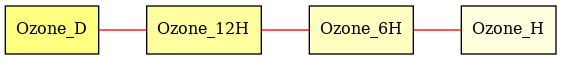

INFO:pyaf.std:END_HIERARCHICAL_PLOTTING_TIME_IN_SECONDS 0.12203121185302734


In [5]:
# create a model to plot the hierarchy.
import pyaf.HierarchicalForecastEngine as hautof
lEngine = hautof.cHierarchicalForecastEngine()
H = 48

lSignalHierarchy = lEngine.plot_Hierarchy(df , "Time_Hourly", "Ozone", H, 
                                          lHierarchy, None);

In [6]:
df.describe(include='all')

,Month,Ozone,Time,Time_Hourly
count,204,204.000000,204,204
unique,204,NaN,204,204
top,1967-11,NaN,1970-02-01 00:00:00,2000-01-08 15:00:00
freq,1,NaN,1,1
first,NaN,NaN,1955-01-01 00:00:00,2000-01-01 00:00:00
last,NaN,NaN,1971-12-01 00:00:00,2000-01-09 11:00:00
mean,NaN,3.835784,NaN,NaN
std,NaN,1.495228,NaN,NaN
min,NaN,1.200000,NaN,NaN
25%,NaN,2.600000,NaN,NaN


In [7]:
# create a hierarchical model and train it
import pyaf.HierarchicalForecastEngine as hautof

lEngine = hautof.cHierarchicalForecastEngine()
lEngine.mOptions.mNbCores = 20
lDateColumn = "Time_Hourly"
lSignalVar = "Ozone";

#
N = df.shape[0];
train_df = df


lSignalHierarchy = lEngine.train(train_df , lDateColumn, lSignalVar, H, lHierarchy, None);

INFO:pyaf.std:START_HIERARCHICAL_TRAINING
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA H {'TH_H_start': {0: Timestamp('2000-01-01 00:00:00'), 1: Timestamp('2000-01-01 01:00:00'), 2: Timestamp('2000-01-01 02:00:00'), 3: Timestamp('2000-01-01 03:00:00'), 4: Timestamp('2000-01-01 04:00:00')}, 'Ozone': {0: 2.7, 1: 2.0, 2: 3.6, 3: 5.0, 4: 6.5}}
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA 6H {'TH_6H_start': {0: Timestamp('2000-01-01 00:00:00'), 1: Timestamp('2000-01-01 06:00:00'), 2: Timestamp('2000-01-01 12:00:00'), 3: Timestamp('2000-01-01 18:00:00'), 4: Timestamp('2000-01-02 00:00:00')}, 'Ozone': {0: 25.9, 1: 36.800000000000004, 2: 28.299999999999997, 3: 37.6, 4: 25.5}}
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA 12H {'TH_12H_start': {0: Timestamp('2000-01-01 00:00:00'), 1: Timestamp('2000-01-01 12:00:00'), 2: Timestamp('2000-01-02 00:00:00'), 3: Timestamp('2000-

In [8]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='TH_H_start' TimeMin=2000-01-01T00:00:00.000000 TimeMax=2000-01-09T11:00:00.000000 TimeDelta=<DateOffset: hours=1> Horizon=48
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone_H' Length=204  Min=1.2 Max=8.7  Mean=3.8357843137254903 StdDev=1.4915592159401185
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Ozone_H' Min=1.2 Max=8.7  Mean=3.8357843137254903 StdDev=1.4915592159401185
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_H_ConstantTrend_residue_bestCycle_byL2_residue_AR(51)' [ConstantTrend + Cycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Ozone_H_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Ozone_H_ConstantTrend_residue_bestCycle_byL2' [Cycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Ozone_H_ConstantTrend_residue_bestCycle_byL2_residue_AR(51)' [AR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.1508 MAPE_Forecast=0.1508 MAPE_Test=0.1508
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.1457 SMAPE_Forecast

In [9]:
list(df.columns)

['Month', 'Ozone', 'Time', 'Time_Hourly']

In [10]:

lForecast = lEngine.forecast(df, iHorizon=H)

INFO:pyaf.std:START_HIERARCHICAL_FORECASTING
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODELS_LEVEL_SIGNAL [(0, 'Ozone_H'), (1, 'Ozone_6H'), (2, 'Ozone_12H'), (3, 'Ozone_D')]
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 1.076423168182373
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 1.2506844997406006
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 1.3807644844055176
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 2.526679754257202
INFO:pyaf.std:END_HIERARCHICAL_FORECAST_TIME_IN_SECONDS 2.8740148544311523


In [11]:
lForecast.tail(H + 6)

,TH_H_start,Ozone_H,Ozone_H_Forecast,Time_Hourly,TH_6H_start,Ozone_6H,Ozone_6H_Forecast,TH_12H_start,Ozone_12H,Ozone_12H_Forecast,TH_D_start,Ozone_D,Ozone_D_Forecast,Ozone_H_BU_Forecast,Ozone_6H_BU_Forecast,Ozone_12H_BU_Forecast,Ozone_D_BU_Forecast
198,2000-01-09 06:00:00,3.5,4.122579,2000-01-09 06:00:00,2000-01-09 06:00:00,14.8,17.019290,NaT,0.0,0.000000,NaT,0.0,0.000000,4.122579,4.122579,17.019290,0.000000
199,2000-01-09 07:00:00,3.3,3.836757,2000-01-09 07:00:00,NaT,0.0,0.000000,NaT,0.0,0.000000,NaT,0.0,0.000000,3.836757,3.836757,0.000000,0.000000
200,2000-01-09 08:00:00,2.7,3.486974,2000-01-09 08:00:00,NaT,0.0,0.000000,NaT,0.0,0.000000,NaT,0.0,0.000000,3.486974,3.486974,0.000000,0.000000
201,2000-01-09 09:00:00,2.5,3.175355,2000-01-09 09:00:00,NaT,0.0,0.000000,NaT,0.0,0.000000,NaT,0.0,0.000000,3.175355,3.175355,0.000000,0.000000
202,2000-01-09 10:00:00,1.6,1.912717,2000-01-09 10:00:00,NaT,0.0,0.000000,NaT,0.0,0.000000,NaT,0.0,0.000000,1.912717,1.912717,0.000000,0.000000
203,2000-01-09 11:00:00,1.2,0.851916,2000-01-09 11:00:00,NaT,0.0,0.000000,NaT,0.0,0.000000,NaT,0.0,0.000000,0.851916,0.851916,0.000000,0.000000
204,2000-01-09 12:00:00,NaN,0.298482,2000-01-09 12:00:00,2000-01-09 12:00:00,0.0,13.614713,2000-01-09 12:00:00,0.0,29.051750,NaT,0.0,0.000000,0.298482,0.298482,13.614713,29.051750
205,2000-01-09 13:00:00,NaN,1.268329,2000-01-09 13:00:00,NaT,NaN,0.000000,NaT,NaN,0.000000,NaT,NaN,0.000000,1.268329,1.268329,0.000000,0.000000
206,2000-01-09 14:00:00,NaN,1.875120,2000-01-09 14:00:00,NaT,NaN,0.000000,NaT,NaN,0.000000,NaT,NaN,0.000000,1.875120,1.875120,0.000000,0.000000
207,2000-01-09 15:00:00,NaN,1.966544,2000-01-09 15:00:00,NaT,NaN,0.000000,NaT,NaN,0.000000,NaT,NaN,0.000000,1.966544,1.966544,0.000000,0.000000


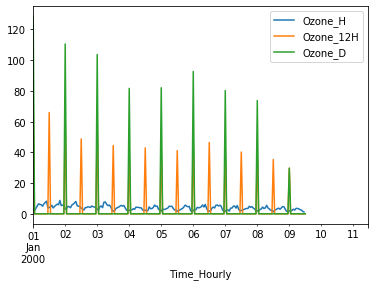

In [12]:
lForecast.plot('Time_Hourly' , ['Ozone_H' , 'Ozone_12H' , 'Ozone_D'] )

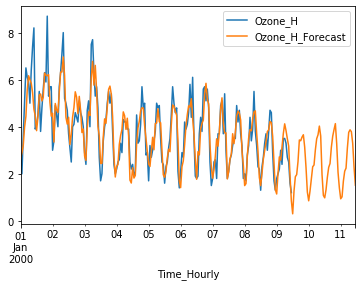

In [13]:
lForecast.plot('Time_Hourly' , ['Ozone_H' , 'Ozone_H_Forecast'] )

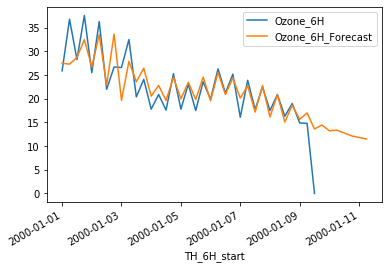

In [14]:
lForecast.plot('TH_6H_start' , ['Ozone_6H' , 'Ozone_6H_Forecast'] )

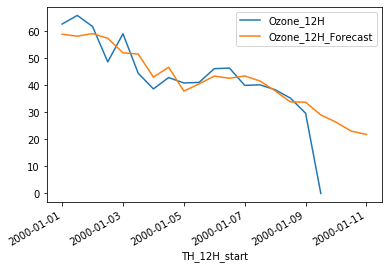

In [15]:
lForecast.plot('TH_12H_start' , ['Ozone_12H' , 'Ozone_12H_Forecast'] )

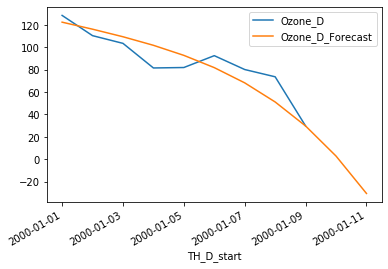

In [16]:
lForecast.plot('TH_D_start' , ['Ozone_D' , 'Ozone_D_Forecast'] )